# CML Assignment - 1

## Overview


### Data Description

In our dataser only 15 descriptive features named below are used.

 1. ID - Unique Patient number
 2. HealthServiceArea - Hospital Location            
 3. Gender - Patient Gender               
 4. Race   - Patient Race                      
 5. TypeOfAdmission   - The manner in which the patient was admitted           
 6. CCSProcedureCode  - AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code 
 7. APRSeverityOfIllnessCode    - Severity of illness
 8. PaymentTypology       - Type of payment       
 9. BirthWeight      - The neonate birth weight in grams; rounded to nearest 100g.            
 10. EmergencyDepartmentIndicator - Emergency Department Indicator( for 045X, it is set to  "Y" or else "N")
 11. AverageCostInCounty          - Average hospitalization Cost In County of the patient
 12. AverageChargesInCounty       - Average medical Charges In County of the patient
 13. AverageCostInFacility        - Average Cost In Facility
 14. AverageChargesInFacility     - Average Charges In Facility
 15. AverageIncomeInZipCode       - Average Income In Zip Code


Target Feature: Length of Stay

The total number of days it took patients to recover from illness/ discharged from hospital.

As per assignment requirements we are supposed to predict if the patient is going to stay in the hospital longer than 3 days or not, i.e Class 0 if LengthOfStay < 4 and class 1 otherwise. Since the initial values of the target features ranges from (0-10). We are further going to replace values (0-3) with '0' and values (4-10) with '1' when we explore Target variable.


In this project we have tried to implement 3 classification models to predict the Length of Stay(LOS).
1. Regression
2. Decision Tree
3. Random Forest





**I have done the preprocessing of the seen data and the unseen data together to avoid redoing preprocessing tasks again.**

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import io
import requests
import os, ssl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
DischargeFrame = pd.read_csv('./Data/train_data.csv', delimiter=',')
Test_Data = pd.read_csv('./Data/test_data.csv', delimiter=',') ## Loading Test Dataset

Loading the dataset and storing it in the Dataframe 'DischargeFrame'.

In [3]:
DischargeFrame.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [4]:
Test_Data.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,1,New York City,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,2,New York City,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,3,New York City,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,4,New York City,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,5,New York City,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


In [5]:
# Setting ID as index
DischargeFrame.set_index("ID", inplace=True)
Test_Data.set_index("ID", inplace=True)

In [6]:
# Converting Dtype of CCSProcedureCode from integer to object type.
DischargeFrame.CCSProcedureCode = DischargeFrame.CCSProcedureCode.astype(object)
Test_Data.CCSProcedureCode = Test_Data.CCSProcedureCode.astype(object)

In [7]:

Test_Data.describe(include = np.object)

,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,PaymentTypology,EmergencyDepartmentIndicator
count,69177,69177,69177,69177,69177,69177,69177
unique,3,3,4,5,7,10,2
top,New York City,M,White,Newborn,228,Medicaid,N
freq,38642,35471,30432,68125,24212,37037,68829


The above table reflects the different types of observations under each categorical column. Lets take a look into futher details

In [8]:
for col in Test_Data.select_dtypes(object):
    print("Column: " + col)
    print(Test_Data[col].value_counts())
    print("===================================")

Column: HealthServiceArea
New York City    38642
Hudson Valley    19156
Finger Lakes     11379
Name: HealthServiceArea, dtype: int64
Column: Gender
M    35471
F    33704
U        2
Name: Gender, dtype: int64
Column: Race
White                     30432
Other Race                27043
Black/African American    10780
Multi-racial                922
Name: Race, dtype: int64
Column: TypeOfAdmission
Newborn      68125
Emergency      495
Urgent         362
Elective       194
Trauma           1
Name: TypeOfAdmission, dtype: int64
Column: CCSProcedureCode
 228    24212
 0      15120
 220    13108
 115    12819
 231     2535
 216      764
-1        619
Name: CCSProcedureCode, dtype: int64
Column: PaymentTypology
Medicaid                     37037
Private Health Insurance     14871
Blue Cross/Blue Shield       12795
Self-Pay                      2508
Managed Care, Unspecified     1539
Federal/State/Local/VA         320
Medicare                        43
Miscellaneous/Other             27
Unknown

Checking if the dataset has been loaded succcessfully in the dataframe and reading first few lines of it.

In this Dataset "Length of Stay " is our target variable.

# Exploratory Data Analysis (EDA)

Now we perform the EDA for the dataset(with Traget) provided


### Checking the shape of dataset


In [9]:
DischargeFrame.shape

(59966, 15)

### Check for Missing values



In [10]:
pd.isna(DischargeFrame).sum()

HealthServiceArea               0
Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

As evident from the above output there is no missing value in the dataset.

In [11]:
# check for missing value in unseen data
pd.isna(Test_Data).sum()

HealthServiceArea               0
Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
dtype: int64

## Checking Data types

In [12]:
DischargeFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 1 to 59966
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   HealthServiceArea             59966 non-null  object
 1   Gender                        59966 non-null  object
 2   Race                          59966 non-null  object
 3   TypeOfAdmission               59966 non-null  object
 4   CCSProcedureCode              59966 non-null  object
 5   APRSeverityOfIllnessCode      59966 non-null  int64 
 6   PaymentTypology               59966 non-null  object
 7   BirthWeight                   59966 non-null  int64 
 8   EmergencyDepartmentIndicator  59966 non-null  object
 9   AverageCostInCounty           59966 non-null  int64 
 10  AverageChargesInCounty        59966 non-null  int64 
 11  AverageCostInFacility         59966 non-null  int64 
 12  AverageChargesInFacility      59966 non-null  int64 
 13  AverageIncomeInZ

From the above output we could observe that the CCSProcedureCode and  APRSeverityOfIllnessCode is of type integer but we need to treat them as categorical features. CCSProcedureCode is a procedure category code in this data frame and APRSeverityOfIllnessCode is ordinal attribute which indicates the severity of illness where its magnitude indicates severity i.e higher magnitude indicates more severity.

All other attributes are of appropriate datatypes.

In [13]:
# check for missing value in unseen data
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69177 entries, 1 to 69177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   HealthServiceArea             69177 non-null  object
 1   Gender                        69177 non-null  object
 2   Race                          69177 non-null  object
 3   TypeOfAdmission               69177 non-null  object
 4   CCSProcedureCode              69177 non-null  object
 5   APRSeverityOfIllnessCode      69177 non-null  int64 
 6   PaymentTypology               69177 non-null  object
 7   BirthWeight                   69177 non-null  int64 
 8   EmergencyDepartmentIndicator  69177 non-null  object
 9   AverageCostInCounty           69177 non-null  int64 
 10  AverageChargesInCounty        69177 non-null  int64 
 11  AverageCostInFacility         69177 non-null  int64 
 12  AverageChargesInFacility      69177 non-null  int64 
 13  AverageIncomeInZ

## Dropping ID and HealthServiceArea from Dataframe

We need to drop the ID and healthservicearea attribute from the dataframe as per assignment instructions since they serve no purpose in prediction. So above we set ID as Index and now we drop Healthservicearea from the dataset.

**Reason:** ID is unique to each observation and removing Heathservice area we could generalize our model beyond the list of health service area given in the dataset.

In [14]:
# dropping HealthServiceArea from both seen dataset and unseen dataset
DischargeFrame.drop(columns = ["HealthServiceArea"], inplace=True)
Test_Data.drop(columns = ["HealthServiceArea"], inplace=True)

## Summary Statistics of Numerical and Categorical attributes

In [15]:
DischargeFrame.describe()

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


* APRSeverityOfIllnessCode is ordinal attribute.

* There seems to be a lot of variance in most of the attributes. So further investigation needs to be done.

* The value ranges varies from one attribute to another and hence feature scaling needs to be done.

* BirthWeight has a maximum weight of 7.5 kg which is very unusual.

* Other Numeric attributes looks fine at first glance but needs further detailed analysis about their distribution

In [16]:
# comparing the seen dataset description with unseen data description
Test_Data.describe()

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
count,69177.000000,69177.000000,69177.000000,69177.000000,69177.000000,69177.000000,69177.000000
mean,1.244792,3330.408951,2552.165763,7931.159793,2543.578169,7922.475563,60.594750
std,0.521187,436.355795,725.397646,2825.156928,1410.789231,3865.295769,21.637225
min,1.000000,2500.000000,631.000000,1491.000000,631.000000,1491.000000,28.000000
25%,1.000000,3000.000000,1944.000000,6546.000000,1494.000000,5157.000000,45.000000
50%,1.000000,3300.000000,2611.000000,8966.000000,2138.000000,6915.000000,57.000000
75%,1.000000,3600.000000,3155.000000,9917.000000,3338.000000,11011.000000,74.000000
max,4.000000,9000.000000,3623.000000,11381.000000,6953.000000,22564.000000,115.000000


In [17]:
DischargeFrame.CCSProcedureCode.value_counts()

 228    19886
 115    13628
 0      11189
 220    10773
 231     2981
-1        769
 216      740
Name: CCSProcedureCode, dtype: int64

Further investigation reveals there are 769 instances of procedure code with -1 value.

### Exploring Categorical Attributes:

In [18]:
DischargeFrame.describe(include = np.object)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,PaymentTypology,EmergencyDepartmentIndicator
count,59966,59966,59966,59966,59966,59966
unique,3,4,4,7,9,2
top,M,White,Newborn,228,Medicaid,N
freq,30978,32943,58741,19886,28723,59453


Summary statistics for all the object type attributes are given above. We can recheck the count and unique values for each attribute and the frequency of the maximum occuring class of each attribute. 

We can observe that:
1. The Emergency Department indicator has only 2 unique values 
2. Gender attribute has 3 unique genders 
3. Race attribute has 4 unique race types 
4. Payment typology needs further investigation as the data description does not state the values to be expected in the dataset.

Lets investigate all of them in details

In [19]:
for col in DischargeFrame.select_dtypes(object):
    print("Column: " + col)
    print(DischargeFrame[col].value_counts())
    print("===================================")

Column: Gender
M    30978
F    28987
U        1
Name: Gender, dtype: int64
Column: Race
White                     32943
Other Race                18314
Black/African American     8183
Multi-racial                526
Name: Race, dtype: int64
Column: TypeOfAdmission
Newborn      58741
Emergency      659
Urgent         412
Elective       154
Name: TypeOfAdmission, dtype: int64
Column: CCSProcedureCode
 228    19886
 115    13628
 0      11189
 220    10773
 231     2981
-1        769
 216      740
Name: CCSProcedureCode, dtype: int64
Column: PaymentTypology
Medicaid                     28723
Private Health Insurance     15608
Blue Cross/Blue Shield       12073
Self-Pay                      1984
Federal/State/Local/VA         849
Managed Care, Unspecified      545
Miscellaneous/Other            118
Medicare                        44
Unknown                         22
Name: PaymentTypology, dtype: int64
Column: EmergencyDepartmentIndicator
N    59453
Y      513
Name: EmergencyDepartmentIndi

**Observations:**

* Gender has 1 unknown row 
* PaymentTypology has few Unknown rows as well. 

Since they are less tha 5% of the total observations its best to drop them from the Dataframe.

In [20]:
DischargeFrame.drop(DischargeFrame[DischargeFrame.PaymentTypology == 'Unknown'].index, inplace=True)
DischargeFrame.drop(DischargeFrame[DischargeFrame.Gender == 'U'].index, inplace=True)

**Now Lets check the Data distribution by plotting histograms**

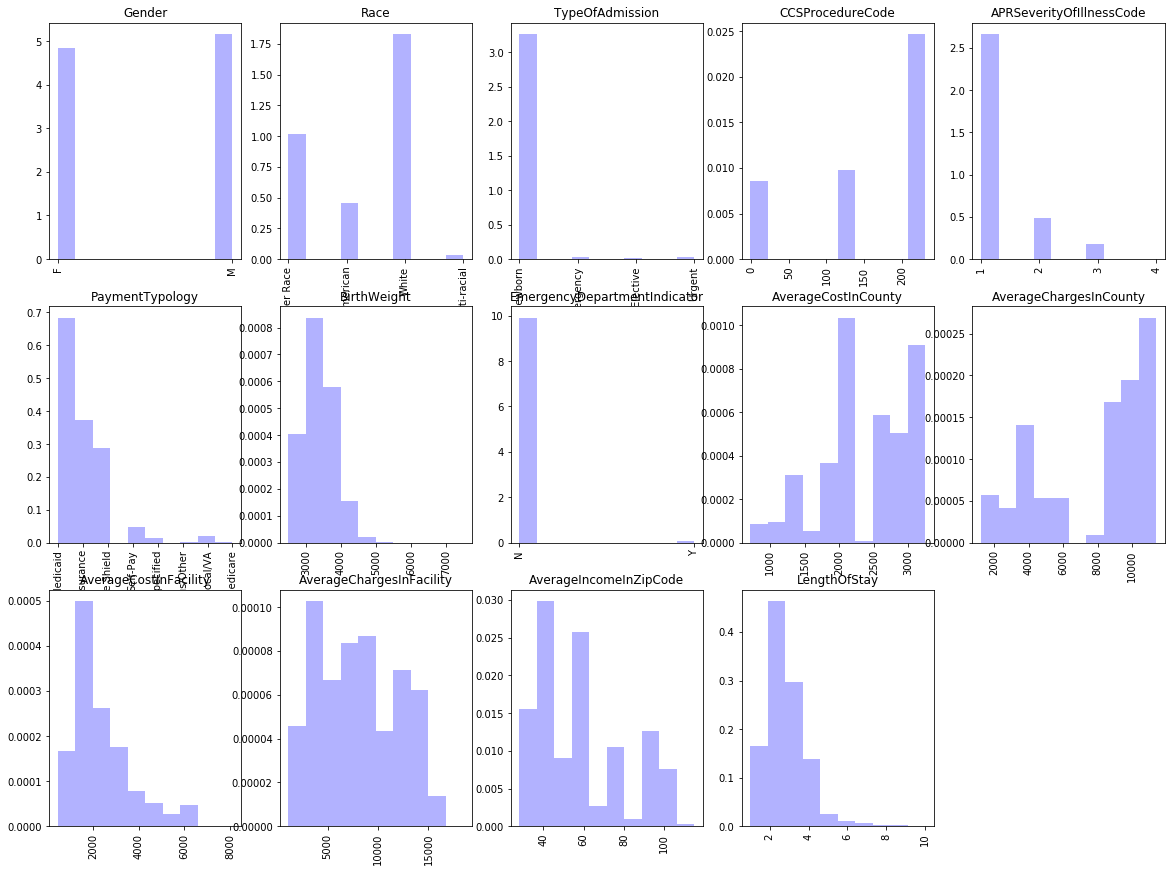

In [21]:
plt.figure(figsize=(20,20))
for i, col in enumerate(DischargeFrame.columns):
    plt.subplot(4,5,i+1)
    plt.hist(DischargeFrame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

**Observations:**

* Instances are mostly for 'New born' type maximum
* CCS procedure code is categorical variable
* Severe cases of magnitude 4 is considerably less.
* Medicaid, Bluecross/Blue shield, Private health Insurance has maximum number of instances under Payment Typology
* Many attributes are skewed i.e Birthweight, Average cost in country, Average cost in facility.
* There are considerably large instances of No in Emergency Department Indicator.

## Scatter plot to explore relation between Target and Numeric attributes

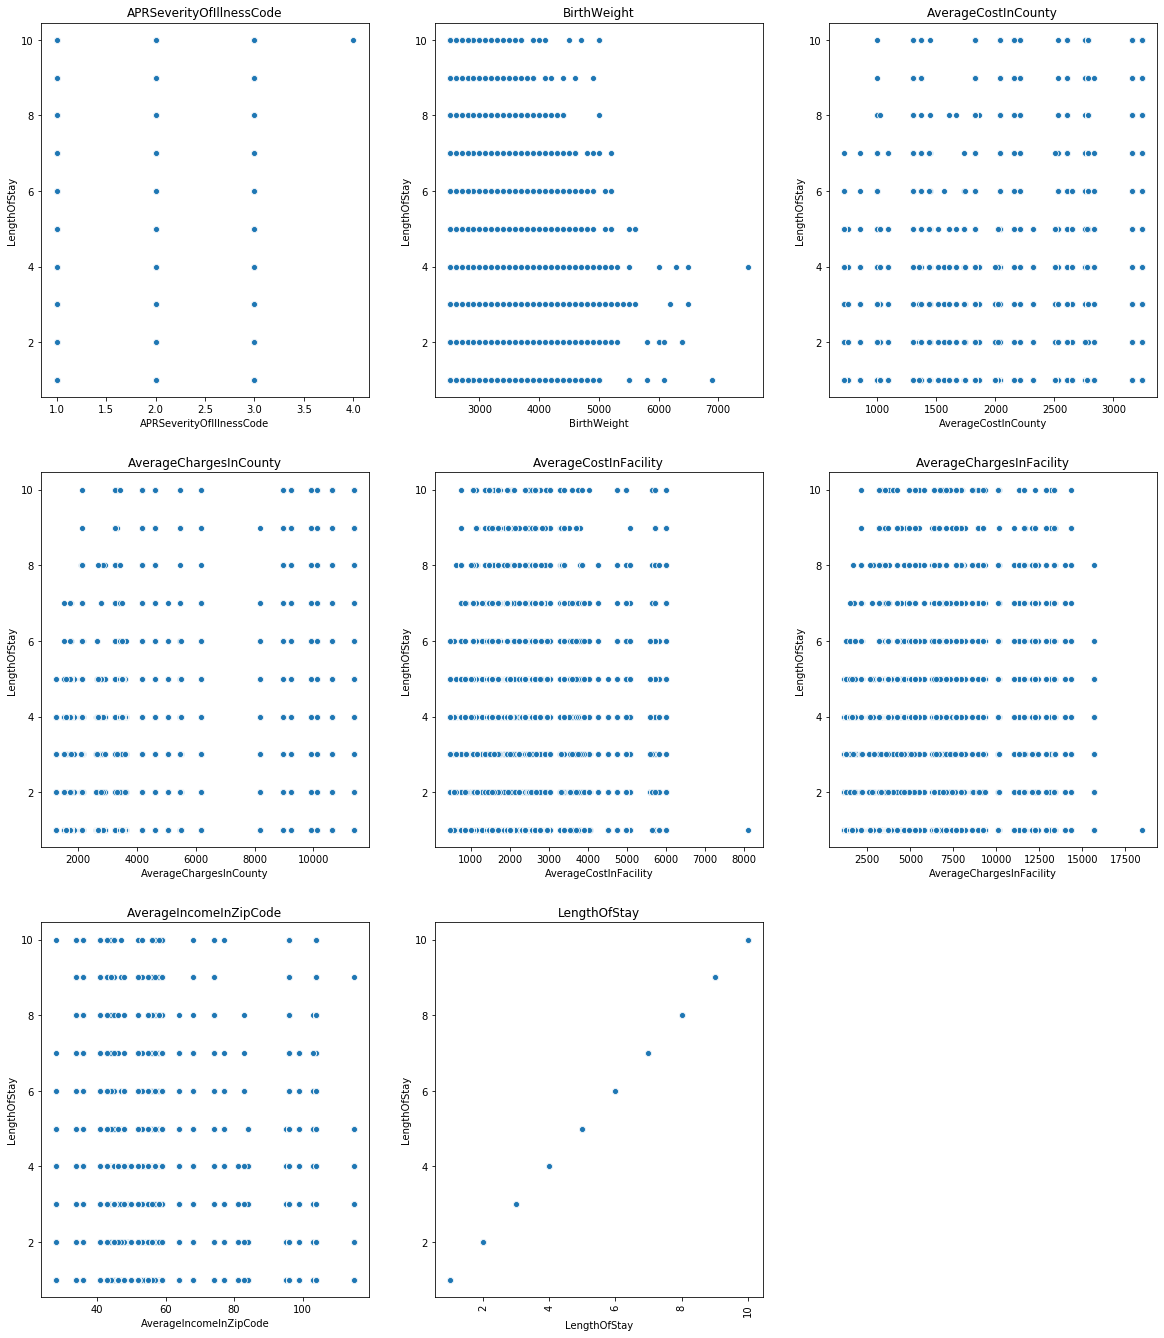

In [22]:
plt.figure(figsize=(20,40))
for i, column in enumerate(DischargeFrame.select_dtypes("int64")):
    plt.subplot(5,3,i+1)
    sns.scatterplot(data=DischargeFrame, x=column, y='LengthOfStay')
    plt.title(column)

plt.xticks(rotation='vertical')
plt.show()

**Observations:**

* There doesnt seems to be any kind of linear realtion between Target column and other numeric attributes. Lets try and look at correlation matric for further investigation.
* CCSprocedurecode and APR severity of illness code are categorical variable but they are of data type int.

**Correlation Plot**

Lets plot a correlation heat map to find out the realtion between each attribute with other

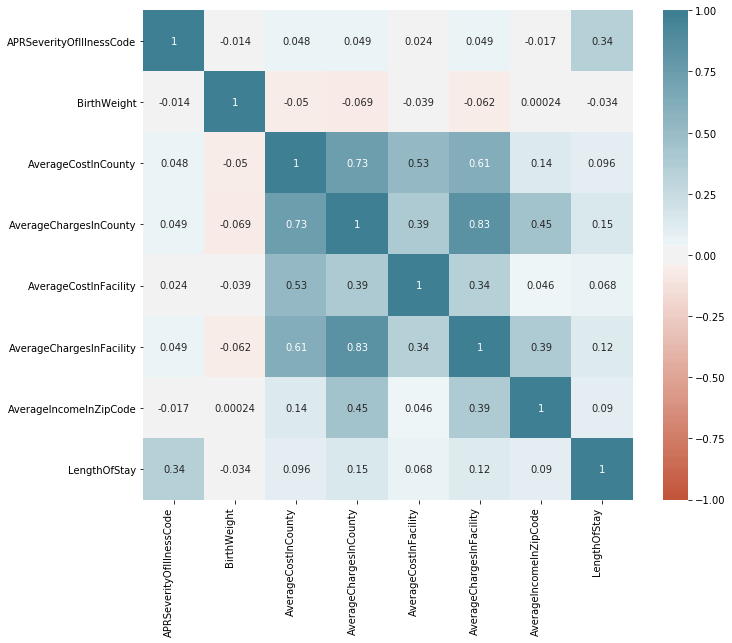

In [23]:
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 9))
corr = DischargeFrame.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

**Observation:**

* What we want to observe is the relation between every attribute with the Target variable in this correlation heat map. We can see from the heatmap above that APRSeverityOfIllnessCode is more correlated with target variable than any other attribute in the dataframe.

* AverageChargesInCounty has high correlation between AverageCostInCounty. Same goes for Average Charges in Facility and Average charges in County




## Exploring Categorical variable.

Distribution of categorical variables


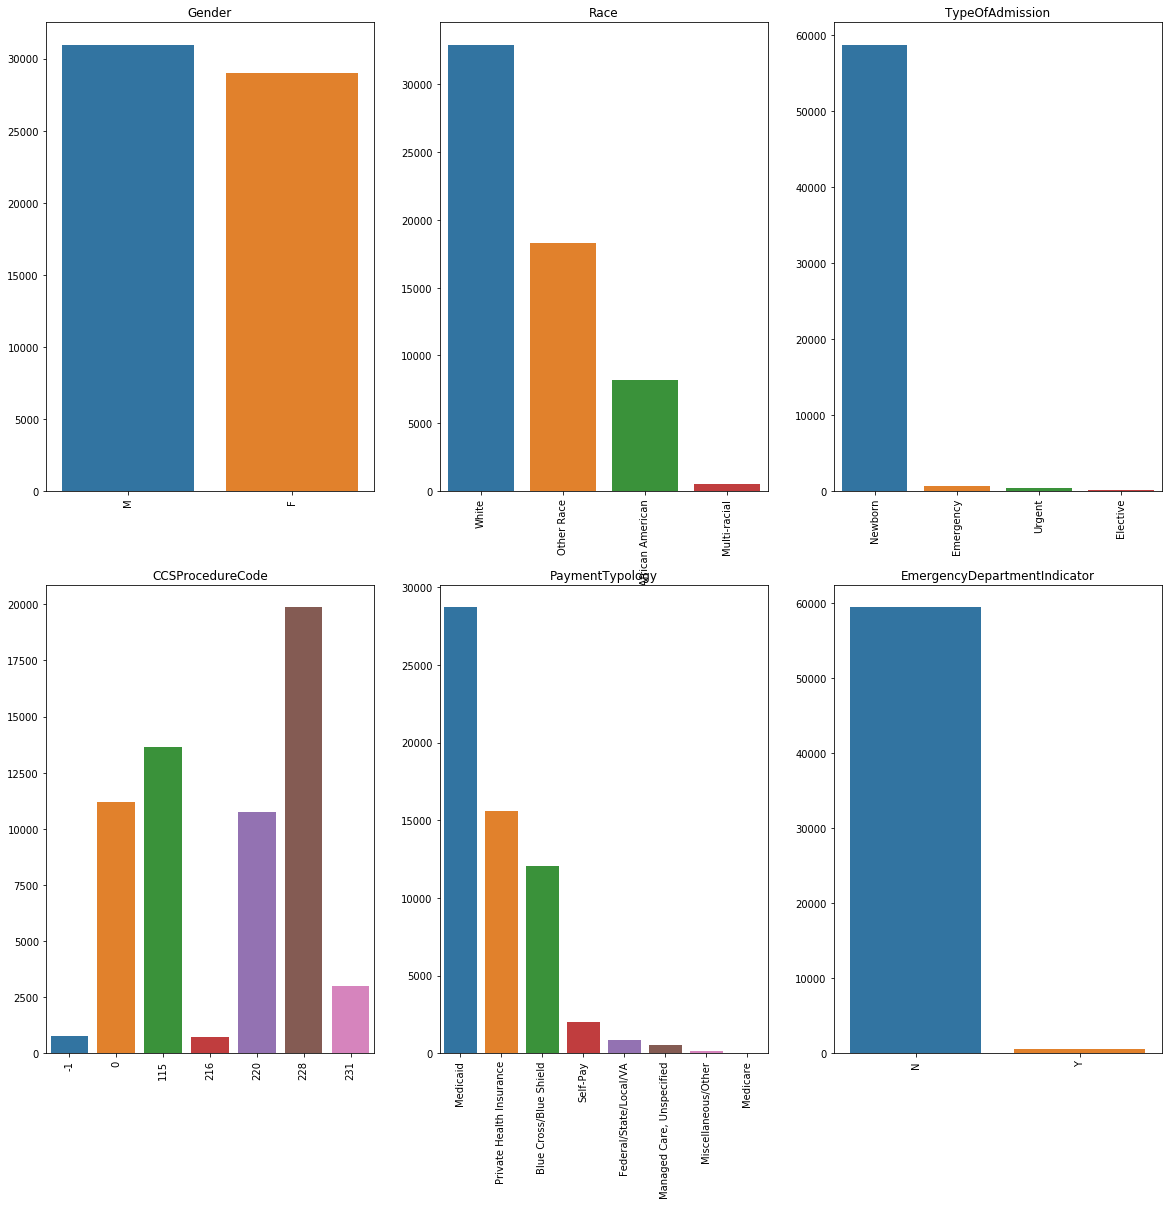

In [24]:
plt.figure(figsize=(20,50))
print("Distribution of categorical variables")
for i, col in enumerate(DischargeFrame.select_dtypes(object)):
    plt.subplot(5,3,i+1)
    sns.barplot(x = DischargeFrame[col].value_counts().index, y = DischargeFrame[col].value_counts().values)
    plt.title(col)
    plt.xticks(rotation='vertical')

* More than 95% of the cases are of Newborn Type of admission
* Medicaid is the most preferred form of payment.
* And as Emergency Department Indicator reflects, most of the cases are not Emergency cases.

## Detection of Outliers

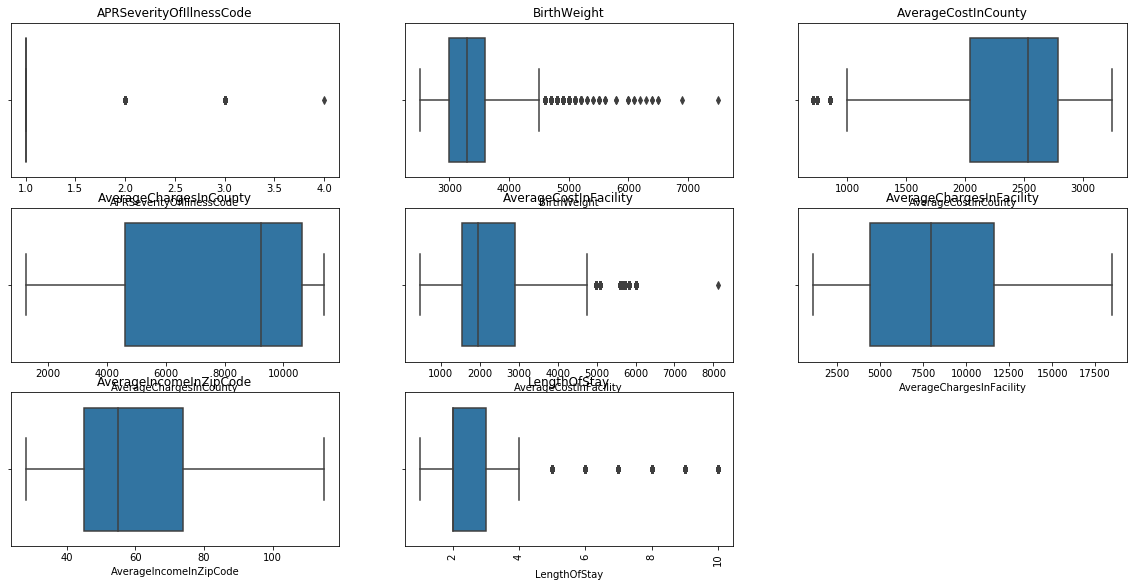

In [25]:
plt.figure(figsize=(20,30))
for i, column in enumerate(DischargeFrame.select_dtypes("int64")):
    plt.subplot(9,3,i+1)
    sns.boxplot(x=column,data=DischargeFrame)
    plt.title(column)

plt.xticks(rotation='vertical')
plt.show()

* As evident from the above plots, Birth weight, Average cost in County, Average cost in facility have outliers with Birthweight has most outliers. These outliers can be treated either by removing those data or replacing it with a suitable value. However I chose not to replace or drop the data points as that would induce a certain degree of bias in the data. Moreover, these data points are not being deleted for a simple reason that a newborn baby might be overweight or underweight. Similarly, Average cost might go down in some instances where a newborn remains admitted just for a single day and might have to pay a lot less as compared to others depending on the severity of illness.

## Exploring Target Variable

Lets check the value counts in the target variable

In [26]:
DischargeFrame.LengthOfStay.value_counts()

2     24991
3     15998
1      8894
4      7494
5      1341
6       557
7       346
8       145
9        97
10       80
Name: LengthOfStay, dtype: int64

Now we need to replace (0-3) with class-0 representing that the patient is going to stay less than 4 days in the hospital and (4-10) with class-1 which represents that the patient will stay longer than 3 days in the hospital

In [27]:
DischargeFrame['LengthOfStay'].replace([0,1,2,3],0, inplace=True)
DischargeFrame['LengthOfStay'].replace([4,5,6,7,8,9,10],1, inplace=True)

In [28]:
DischargeFrame.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,
1,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,0
2,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,0
3,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,0
4,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,0
5,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,0


In [29]:
DischargeFrame.LengthOfStay.value_counts()

0    49883
1    10060
Name: LengthOfStay, dtype: int64

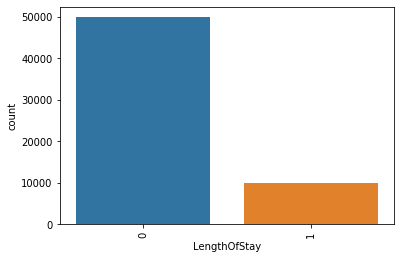

In [30]:
sns.countplot(x="LengthOfStay", data=DischargeFrame)
plt.xticks(rotation='vertical')
plt.show()

# One-Hot Encoding of Categorical features

Now we need to convert all categorical variables into numeric ones. We do that using One-Hot Encoding. We use the scikitlearn package OneHotEncoder

In [31]:
from sklearn.preprocessing import OneHotEncoder

columns = DischargeFrame.select_dtypes(object).columns.to_list()

for column in columns:
    OHE = OneHotEncoder(handle_unknown='ignore')
    OHE.fit(DischargeFrame[[column]])
    onehot_ = OHE.transform(DischargeFrame[[column]]).toarray()
    onehot_test = OHE.transform(Test_Data[[column]]).toarray() #One hot encoding of unseen data

    for i in range(len(OHE.categories_[0])):
        DischargeFrame[column + '_' + str(OHE.categories_[0][i])] = onehot_[:,i]
        Test_Data[column + '_' + str(OHE.categories_[0][i])] = onehot_test[:,i] # Transformed Unseen data

Now after One hot encoding we drop the original attributes that are of data type object.

In [32]:
# dropping the original columns after One hot encoding from both Seen and Unseen Data
for col in DischargeFrame.select_dtypes(object): 
    DischargeFrame = DischargeFrame.drop([col], axis=1)
    Test_Data = Test_Data.drop([col], axis=1)

DischargeFrame.head()


,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,...,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
ID,,,,,,,,,,,,,,,,,,,,,
1,1,3700,2611,9227,1751,8951,45,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,2900,3242,8966,3338,6409,34,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,3200,3155,11381,4980,9323,45,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,3300,3155,11381,5826,15680,59,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,1,2600,2611,9227,6000,14344,59,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
Test_Data.head()

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,Gender_F,Gender_M,Race_Black/African American,...,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
ID,,,,,,,,,,,,,,,,,,,,,
1,3,4900,3242,8966,2448,13196,34,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3100,2611,9227,1751,8951,45,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,3300,3155,11381,1052,11314,74,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,3300,2611,9227,3790,6250,45,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2,3800,3155,11381,3032,10135,59,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
DischargeFrame.shape


(59943, 35)

In [35]:
Test_Data.shape

(69177, 34)

## Separating Target feature 

Now after completing the Exporatory Data Analysis we move ahead to separate the Target attribute from the original dataset for the purpose of Modelling and store it separately.

In [36]:
DischargeFrame_x = DischargeFrame.drop(['LengthOfStay'], axis=1)
DischargeFrame_y = DischargeFrame['LengthOfStay']

In [37]:
DischargeFrame_x.shape

(59943, 34)

In [38]:
Test_Data.shape

(69177, 34)

## Train-Test Splitting

Now we split our data into Train, validation and Test set. We can use either Hold out validation method or cross validation method for this purpose but since the number of instances are sufficient(~60000) we can go ahead with holdout validation method.

Following Splits were used:

  **Train- Validation -Test split- 60-20-20**
    

In [39]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    DischargeFrame_x_train, DischargeFrame_x_test, DischargeFrame_y_train, DischargeFrame_y_test = train_test_split(DischargeFrame_x,
                                                                                                    DischargeFrame_y, 
                                                                                                    test_size=0.20, 
                                                                                                    shuffle=True)

with pd.option_context('mode.chained_assignment', None):
    hospital_X_train, hospital_X_valid, hospital_y_train, hospital_y_valid = train_test_split(DischargeFrame_x_train, 
                                                                            DischargeFrame_y_train, test_size=0.25, 
                                                                            shuffle=True, random_state=0)

In [40]:
print("Nunber of instances in the original dataset is {}. After spliting Train has {} instances and test has {} instances."
      .format(DischargeFrame_x.shape[0], DischargeFrame_x_train.shape[0], DischargeFrame_x_test.shape[0]))

print("After spliting Train has {} instances and Validation set has {} instances."
      .format(hospital_X_train.shape[0], hospital_X_valid.shape[0]))

Nunber of instances in the original dataset is 59943. After spliting Train has 47954 instances and test has 11989 instances.
After spliting Train has 35965 instances and Validation set has 11989 instances.


## Feature Scaling

Once all categorical features are encoded, all features in this dataset will be numerical. Now we need to scale these numerical features before fitting any models as the numerical features with higher values might affect the models computation speed. Moreover, the difference in magnitude of one attribute with other might affect the prediction accuarcy of the model.

So we need to first apply power transformation on numeric attributes that are skewed and then apply scaling technique on the dataset.

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

logNorm_attributes = ['AverageCostInCounty','AverageChargesInCounty','AverageCostInFacility','AverageChargesInFacility','AverageIncomeInZipCode']
minmax_attributes = list(set(hospital_X_train.columns).difference(set(logNorm_attributes)))

df_train_scaled = hospital_X_train.copy()
df_valid_scaled = hospital_X_valid.copy()
df_test_scaled = DischargeFrame_x_test.copy()
# unseen Data
df_test_data_scaled = Test_Data.copy() 

minmaxscaler = MinMaxScaler().fit(df_train_scaled.loc[:, minmax_attributes])

df_train_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(df_train_scaled.loc[:, minmax_attributes])
df_valid_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(df_valid_scaled.loc[:, minmax_attributes])
df_test_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(df_test_scaled.loc[:, minmax_attributes])
# unseen Data
df_test_data_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(df_test_data_scaled.loc[:, minmax_attributes])


powertransformer = PowerTransformer(method='box-cox', standardize=False).fit(df_train_scaled.loc[:, logNorm_attributes])
df_train_scaled.loc[:, logNorm_attributes] = powertransformer.transform(df_train_scaled.loc[:, logNorm_attributes])
df_valid_scaled.loc[:, logNorm_attributes] = powertransformer.transform(df_valid_scaled.loc[:, logNorm_attributes])
df_test_scaled.loc[:, logNorm_attributes] = powertransformer.transform(df_test_scaled.loc[:, logNorm_attributes])
# unseen Data
df_test_data_scaled.loc[:, logNorm_attributes] = powertransformer.transform(df_test_data_scaled.loc[:, logNorm_attributes])# unseen Data

minmaxscaler_pt = MinMaxScaler().fit(df_train_scaled.loc[:, logNorm_attributes])
df_train_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(df_train_scaled.loc[:, logNorm_attributes])
df_valid_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(df_valid_scaled.loc[:, logNorm_attributes])
df_test_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(df_test_scaled.loc[:, logNorm_attributes])
# unseen Data
df_test_data_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(df_test_data_scaled.loc[:, logNorm_attributes])# unseen Data


We completed the feature scaling, now we check if the train test and validation split are well in order and are well distributed amongst train and validation set by plotting train and validation data first and train and test data next.

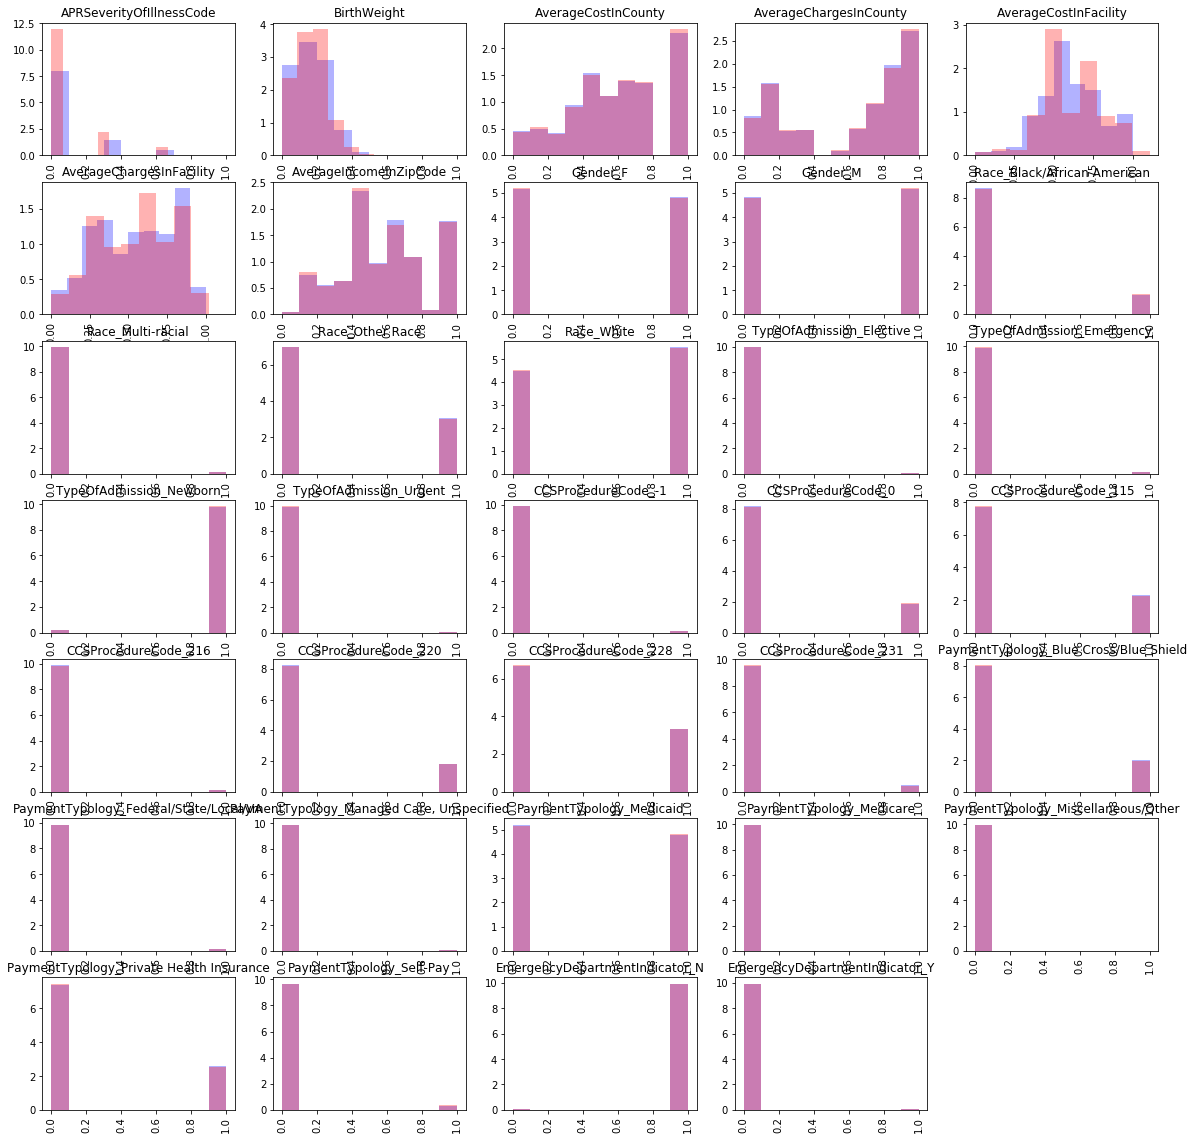

In [42]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df_train_scaled.columns):
    plt.subplot(7,5,i+1)
    plt.hist(df_train_scaled[col], alpha=0.3, color='b', density=True)
    plt.hist(df_valid_scaled[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

**Observations:**

The train and validation split has very good overlap hence indicating the distribution of train set attributes is approximately equal to the distribution of validation set attribute.

### Renaming scaled train, validation and test dataset for convinience

In [43]:
H_train = df_train_scaled.copy()
H_valid = df_valid_scaled.copy()
H_test = df_test_scaled.copy()
t_train = hospital_y_train.copy()
t_valid = hospital_y_valid.copy()
t_test = DischargeFrame_y_test.copy()

# Modelling

**Performance metric to be used:**
    
Since there is heavy class imbalance in the target colummn it is appropriate to use f1 score as the performance metric to give equal importance to both classes.

In [44]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1

## Model Training


## Logistic Regression


* We cant use logistic regression since target feature does not seems to have any kind of linearity with any other attributes which is also supported by the correlation matrix where the APRSeverityOfIllness code is a bit collinear.

* Moreover we have a number of categorical attributes in the dataset, so it is better to explore other models for better performnace.

## Decision Tree 

Lets try with Decison tree model and start with a baseline model.

In [45]:
## Baseline model
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT = clf_DT.fit(H_train, t_train)

In [46]:
train_f1, val_f1 = get_f1_scores(clf_DT, H_train, t_train, H_valid, t_valid)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.918
Validation F1-Score score: 0.595


It is clear from the above train and validation score that this is a case of overfitting. There is considerable difference between the f1-scores of train and validation datset.

Now we further need to optimise our model and try and reduce the degree of overfitting. We use stratified Cross validation method and grid search method to find the best combination of parameters for our model.

In [47]:
from sklearn.model_selection import GridSearchCV


params_DT = {'max_depth': [2, 4, 6, 8,12,15,20],
                  'min_samples_split': np.arange(2,50,5),
                  'criterion': ['gini', 'entropy'],
                    "class_weight":["balanced"]}

gs_DT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=999), 
                      param_grid=params_DT, 
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='f1', 
                      return_train_score=True)

gs_DT.fit(H_train, t_train);

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:  1.2min finished


In [48]:
gs_DT.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 42}

In [49]:
gs_DT.estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=999, splitter='best')

In [50]:
train_f1, val_f1 = get_f1_scores(gs_DT.best_estimator_, H_train, t_train, H_valid, t_valid)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.624
Validation F1-Score score: 0.601


**Observation**

So after Hyperparameter tuning, we see that the degree of overfitting is considerably reduced and now we can go ahead and apply our model to test it performance on test data.

In [51]:
test_pred = gs_DT.best_estimator_.predict(H_test)
    
print(f1_score(t_test, test_pred, average='macro'))

0.6076337320519025


Hence we can say that our tuned Decision tree model is able to genaralize well on the test dataset.

## Random Forest

Lets try and build a base model for Random forest as well

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF = clf_RF.fit(H_train, t_train)

In [53]:
train_f1, val_f1 = get_f1_scores(clf_RF, H_train, t_train, H_valid, t_valid)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.921
Validation F1-Score score: 0.600


Very similar to the Decision tree classifier the Random Forest model also exhibits high degree of overfitting. Lets try and optimise our model by doing hyperparametr tuning using grid search cv and stratified cross validation method.

In [54]:
from sklearn.ensemble import RandomForestClassifier


params_RF = {'max_depth': [8,10,12],
                  'min_samples_split': [ 5, 6, 8],
                  'criterion': ['gini', 'entropy'], 
                  'bootstrap': ['True'],
                   "class_weight":["balanced"],             
                  'n_estimators':[400]}

gs_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=999), 
                          param_grid=params_RF, 
                          refit=True,
                          n_jobs=-2,
                          scoring='f1',
                          verbose=1) 

gs_RF.fit(H_train, t_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:  3.5min finished


In [55]:
gs_RF.best_params_

{'bootstrap': 'True',
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 12,
 'min_samples_split': 8,
 'n_estimators': 400}

In [56]:
gs_RF.best_estimator_

RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)

In [57]:
train_f2, val_f2 = get_f1_scores(gs_RF.best_estimator_, H_train, t_train, H_valid, t_valid)
print("Train F1-Score score: {:.3f}".format(train_f2))
print("Validation F1-Score score: {:.3f}".format(val_f2))

Train F1-Score score: 0.679
Validation F1-Score score: 0.640


In [58]:
test_pred = gs_RF.best_estimator_.predict(H_test)
    
print(f1_score(t_test, test_pred, average='macro'))

0.6378540887914548


## Model Selection:

Comparison of Decision Tree and Random forest classifier

* Hyperparameter Tuned Decision Tree classifier
        The best parameteers with which our model performed the best:
        class_weight': 'balanced','criterion': 'gini','max_depth': 8, 'min_samples_split': 7
        **Train F1-Score score: 0.624**
        **Validation F1-Score score: 0.601**
        **Test F1 score of 0.607**
    
* Hyperparameter Tuned Random Forest classifier
        The best parameteers with which our model performed the best:
        RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=999,
                       verbose=0, warm_start=False)
  Train F1-Score score: 0.690
  Validation F1-Score score: 0.645
    Test F1 score of 0.642
    
 
 
**Both our models performed well in terms of F1 score and generalizing the dataset. However the degree of overfitting seems to be less in case of Decison tree classifier. So in my case based on the degree of overfitting I would say Decision tree classifier performed the best.**

**Improvement :**

Due to heavy computation power requirements, we could not try more varieties of inputs in each model.
We could also try other models as well to better our performance.

## Performance on Unseen Data

We have done our preprocessing of the Unseen data along with the Data provided to us for modelling. Now we can straightaway move to predict the values on the unseen data.

In [59]:
df_test_data_scaled.head()

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,Gender_F,Gender_M,Race_Black/African American,...,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
ID,,,,,,,,,,,,,,,,,,,,,
1,0.666667,0.48,1.000000,0.686877,0.670133,0.874157,0.190163,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.12,0.684410,0.718868,0.542044,0.635611,0.429693,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.16,0.954269,1.000000,0.341930,0.772683,0.770067,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.16,0.684410,0.718868,0.833130,0.460523,0.429693,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.333333,0.26,0.954269,1.000000,0.750489,0.705818,0.627103,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
predict = gs_DT.best_estimator_.predict(df_test_data_scaled)

In [61]:
predict_df = pd.DataFrame({
    "ID":df_test_data_scaled.index,
    "LengthOfStay":predict
})

In [62]:
predict_df.head()

,ID,LengthOfStay
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1


In [63]:
predict_df.LengthOfStay.value_counts()

0    54370
1    14807
Name: LengthOfStay, dtype: int64

In [64]:
predict_df.to_csv("s3798988_predictions.csv", index=False)